<a href="https://www.kaggle.com/code/ljs930303/1-python-cleaning-and-analysis?scriptVersionId=106813522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# https://www.kaggle.com/code/ljs930303/1-python-cleaning-and-analysis

import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

# 1. Loading and cleaning raw data

## 1.1. Y-variables
- Price (df_price)
- Price change (df_price_mom)

In [2]:
# loading first dataframe - average apartment price by region and size

df_price = pd.read_csv('../input/portfolio-pjt-1/(apartment price)    (2016 1).csv')
df_price = df_price.set_index(['region', 'size (sq m)'])


# fixing columns for October which lost the last '0' when converted into csv - e.g. 2016.1 -> 2016.10

for col in df_price.columns.tolist():
    if len(col) == 6:
        df_price.rename({'{}'.format(col): '{}'.format(col) + '0'}, axis=1, inplace=True)
    else:
        continue
        
df_price = df_price.transpose()

# changing some region names (column header) that aren't recognized in Tableau

df_price.rename({'Chungcheong, North': 'Chungcheongbuk-do',\
                'Chungcheong, South': 'Chungcheongnam-do',\
                'Jeonla, North': 'Jeollabuk-do',\
                'Jeonla, South': 'Jeollanam-do',\
                'Gyeongsang, North': 'Gyeongsangbuk-do',\
                'Gyeongsang, South': 'Gyeongsangnam-do'}, axis=1, inplace=True)

df_price

region             Total                                                  \
size (sq m)        135<x  102<x<=135   85<x<=102    60<x<=85       x<=60   
2016.01       729.681955  460.909690  411.373290  291.539654  183.714495   
2016.02       730.009283  461.119752  411.757941  291.968191  183.987179   
2016.03       730.606910  461.439217  412.223539  292.253439  184.425157   
2016.04       731.576961  461.812792  412.976511  292.691311  184.907381   
2016.05       732.759264  462.493311  414.037749  293.508980  185.679068   
...                  ...         ...         ...         ...         ...   
2021.11      1279.787662  856.486290  734.740844  515.224525  341.069159   
2021.12      1292.662772  864.605563  748.720197  523.957496  340.837131   
2022.01      1299.701353  873.164888  763.662453  532.881046  340.748042   
2022.02      1310.788961  882.109245  780.777020  541.845462  340.690177   
2022.03      1320.898880  889.511362  794.587868  549.029527  340.629873   

region             Seoul                                                     \
size (sq m)        135<x   102<x<=135    85<x<=102     60<x<=85       x<=60   
2016.01      1372.566035   749.857092   708.338160   492.830152  336.528271   
2016.02      1373.462892   749.964388   708.831363   493.549126  337.104602   
2016.03      1374.807216   750.318733   709.910037   494.169733  338.687150   
2016.04      1376.141196   751.376331   712.934645   495.604645  340.799261   
2016.05      1379.905167   753.728707   718.461439   498.650227  343.934332   
...                  ...          ...          ...          ...         ...   
2021.11      2544.585120  1623.330590  1497.777347  1143.086947  864.515790   
2021.12      2580.238493  1635.520291  1528.687363  1162.247933  865.163950   
2022.01      2605.309422  1648.714989  1553.197594  1181.937873  866.060649   
2022.02      2639.279647  1663.018878  1584.444659  1201.805095  866.934731   
2022.03      2670.087771  1675.024752  1610.585669  1217.981530  867.725727   

region       ... Gyeongsangbuk-do                                      \
size (sq m)  ...            135<x  102<x<=135   85<x<=102    60<x<=85   
2016.01      ...       351.400083  284.388947  257.245397  190.181005   
2016.02      ...       351.400083  283.859770  257.044451  189.436336   
2016.03      ...       351.472320  283.253753  256.575579  189.319415   
2016.04      ...       351.472320  282.791658  256.575579  188.777585   
2016.05      ...       351.472320  282.658529  256.542088  188.253510   
...          ...              ...         ...         ...         ...   
2021.11      ...       397.093974  315.412102  317.025587  208.611015   
2021.12      ...       396.619371  319.061388  320.183678  214.187829   
2022.01      ...       396.268513  322.860116  323.630210  219.844589   
2022.02      ...       396.010917  326.819384  327.431898  225.747489   
2022.03      ...       395.939558  330.119322  330.609427  230.502585   

region                  Gyeongsangnam-do                                      \
size (sq m)       x<=60            135<x  102<x<=135   85<x<=102    60<x<=85   
2016.01      106.414853       447.324987  308.131051  290.555139  228.147718   
2016.02      105.911032       447.022205  310.263191  290.990727  228.611722   
2016.03      105.646747       447.119879  311.216286  289.861501  228.741524   
2016.04      105.124698       447.775288  311.237937  290.077877  228.689083   
2016.05      104.544514       447.775288  311.272884  289.527760  228.676440   
...                 ...              ...         ...         ...         ...   
2021.11       93.421673       463.793550  364.158672  346.546982  254.755868   
2021.12       94.226026       466.618353  371.530318  360.072934  260.346743   
2022.01       95.083684       470.680076  379.619552  370.881749  266.201368   
2022.02       96.028966       475.646831  388.209219  385.948082  272.323966   
2022.03       96.808321       480.850151  395.788950  396.584923  277.600

In [3]:
# adding another dataframe for a new y-variable - MoM (month over month) price change rate 

df_price_mom = df_price.pct_change()*100
df_price_mom = df_price_mom.replace(np.nan, 0)
df_price_mom

region          Total                                              Seoul  \
size (sq m)     135<x 102<x<=135 85<x<=102  60<x<=85     x<=60     135<x   
2016.01      0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
2016.02      0.044859   0.045576  0.093504  0.146991  0.148429  0.065342   
2016.03      0.081866   0.069280  0.113076  0.097698  0.238048  0.097878   
2016.04      0.132773   0.080959  0.182661  0.149826  0.261474  0.097030   
2016.05      0.161610   0.147358  0.256973  0.279362  0.417337  0.273516   
...               ...        ...       ...       ...       ...       ...   
2021.11      2.110060   2.011397  6.144629  3.953792  1.750354  2.894208   
2021.12      1.006035   0.947975  1.902624  1.694984 -0.068030  1.401147   
2022.01      0.544502   0.989969  1.995706  1.703106 -0.026138  0.971652   
2022.02      0.853089   1.024361  2.241117  1.682255 -0.016982  1.303884   
2022.03      0.771285   0.839138  1.768860  1.325851 -0.017701  1.167293   

region                                                ... Gyeongsangbuk-do  \
size (sq m) 102<x<=135 85<x<=102  60<x<=85     x<=60  ...            135<x   
2016.01       0.000000  0.000000  0.000000  0.000000  ...         0.000000   
2016.02       0.014309  0.069628  0.145887  0.171258  ...         0.000000   
2016.03       0.047248  0.152176  0.125744  0.469453  ...         0.020557   
2016.04       0.140953  0.426055  0.290368  0.623617  ...         0.000000   
2016.05       0.313076  0.775217  0.614518  0.919917  ...         0.000000   
...                ...       ...       ...       ...  ...              ...   
2021.11       1.719818  5.554173  3.951330  1.216401  ...         1.847926   
2021.12       0.750907  2.063726  1.676249  0.074974  ...        -0.119519   
2022.01       0.806758  1.603351  1.694126  0.103645  ...        -0.088462   
2022.02       0.867578  2.011789  1.680902  0.100926  ...        -0.065006   
2022.03       0.721933  1.649853  1.346012  0.091240  ...        -0.018019   

region                                               Gyeongsangnam-do  \
size (sq m) 102<x<=135 85<x<=102  60<x<=85     x<=60            135<x   
2016.01       0.000000  0.000000  0.000000  0.000000         0.000000   
2016.02      -0.186075 -0.078114 -0.391558 -0.473450        -0.067687   
2016.03      -0.213492 -0.182409 -0.061720 -0.249535         0.021850   
2016.04      -0.163138  0.000000 -0.286198 -0.494145         0.146585   
2016.05      -0.047077 -0.013053 -0.277615 -0.551902         0.000000   
...                ...       ...       ...       ...              ...   
2021.11       2.623111  2.138406  6.490047  1.828401         2.997481   
2021.12       1.156990  0.996163  2.673308  0.860992         0.609065   
2022.01       1.190595  1.076423  2.641028  0.910214         0.870459   
2022.02       1.226311  1.174701  2.685033  0.994158         1.055229   
2022.03       1.009713  0.970440  2.106378  0.811583         1.093946   

region                                                 
size (sq m) 102<x<=135  85<x<=102  60<x<=85     x<=60  
2016.01       0.000000   0.000000  0.000000  0.000000  
2016.02       0.691959   0.149916  0.203379  0.132173  
2016.03       0.307189  -0.388063  0.056778 -0.193906  
2016.04       0.006957   0.074648 -0.022926 -0.022436  
2016.05       0.011228  -0.189644 -0.005529 -0.186344  
...                ...        ...       ...       ...  
2021.11       4.392979  13.836766  4.963972  2.414827  
2021.12       2.024295   3.903064  2.194601  0.220789  
2022.01       2.177274   3.001840  2.248780  0.290010  
2022.02       2.262704   4.062301  2.299988  0.372326  
2022.03       1.952486   2.756029  1.937640  0.411409  

[75 rows x 85 columns]

## 1.2. X-variables
- Population (df_pop)
- New house supply (df_supply)
- Base interest rate (df_int_rate)
- Unsold houses (df_unsold)
- Money balance (df_money_balance)
- Money balance change rate (df_money_change_rate)

In [4]:
# loading second dataframe - population

df_pop = pd.read_csv('../input/portfolio-pjt-1/(population) _____.csv')
df_pop = df_pop.set_index('region')

# fixing columns for October which lost the last '0' when converted into csv - e.g. 2016.1 -> 2016.10

for col in df_pop.columns.tolist():
    if len(col) == 6:
        df_pop.rename({'{}'.format(col): '{}'.format(col) + '0'}, axis=1, inplace=True)
    else:
        continue
        
df_pop = df_pop.transpose()

# changing some region names (column header) that aren't recognized in Tableau

df_pop.rename({'Chungcheong, North': 'Chungcheongbuk-do',\
                'Chungcheong, South': 'Chungcheongnam-do',\
                'Jeonla, North': 'Jeollabuk-do',\
                'Jeonla, South': 'Jeollanam-do',\
                'Gyeongsang, North': 'Gyeongsangbuk-do',\
                'Gyeongsang, South': 'Gyeongsangnam-do'}, axis=1, inplace=True)

df_pop

region,Total,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi,Gangwon,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju
2016.01,51541582,10018537,3513361,2487823,2927195,1472802,1518024,1173568,215418,12536474,1549193,1583982,2078572,1868354,1906904,2701160,3364764,625451
2016.02,51555409,10014261,3513192,2486589,2928596,1472153,1517716,1173143,220108,12551398,1548016,1583781,2080030,1867534,1905700,2701055,3364695,627442
2016.03,51569536,10009588,3512444,2486059,2929817,1471618,1517118,1172959,223461,12565891,1547845,1584325,2081092,1866691,1905239,2701148,3365021,629220
2016.04,51584349,10002979,3511974,2485663,2932141,1471819,1516904,1172925,225488,12578597,1548170,1585312,2082319,1866184,1904917,2701238,3366658,631061
2016.05,51601265,9995784,3510833,2485134,2933959,1472317,1516494,1173147,227972,12594829,1547821,1586414,2084034,1865634,1904449,2701912,3367730,632802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.11,51652704,9520880,3353627,2388230,2946319,1442138,1453675,1122495,369465,13557973,1538273,1597019,2119529,1788616,1833864,2627468,3316365,676768
2021.12,51638809,9509458,3350380,2385412,2948375,1441611,1452251,1121592,371895,13565450,1538492,1597427,2119257,1786855,1832803,2626609,3314183,676759
2022.01,51632473,9505926,3348874,2383858,2949150,1441636,1451272,1121100,374377,13571450,1538660,1597097,2118638,1785392,1832604,2624310,3311438,676691
2022.02,51625561,9508451,3347396,2381095,2950978,1440032,1450862,1119446,376399,13574369,1539051,1597022,2118912,1783923,1831451,2622026,3307005,677143


In [5]:
# loading thrid dataframe - number of new houses sold (new supply in housing market)

df_supply = pd.read_csv('../input/portfolio-pjt-1/(new house supply) __.csv')
df_supply = df_supply.set_index('region')
df_supply

# fixing columns for October which lost the last '0' when converted into csv - e.g. 2016.1 -> 2016.10

for col in df_supply.columns.tolist():
    if len(col) == 6 and col != 'region':
        df_supply.rename({'{}'.format(col): '{}'.format(col) + '0'}, axis=1, inplace=True)
    else:
        continue
        
df_supply = df_supply.transpose()

# changing some region names (column header) that aren't recognized in Tableau

df_supply.rename({'Chungcheong, North': 'Chungcheongbuk-do',\
                'Chungcheong, South': 'Chungcheongnam-do',\
                'Jeonla, North': 'Jeollabuk-do',\
                'Jeonla, South': 'Jeollanam-do',\
                'Gyeongsang, North': 'Gyeongsangbuk-do',\
                'Gyeongsang, South': 'Gyeongsangnam-do'}, axis=1, inplace=True)

df_supply.head()

region,Total,Seoul,Incheon,Gyeonggi,Busan,Daegu,Gwangju,Daejeon,Ulsan,Sejong,Gangwon,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju
2016.01,11331,482,0,0,210,305,301,0,0,0,1998,306,2687,328,0,272,4360,82
2016.02,11887,762,418,1740,845,262,64,0,0,0,0,0,182,713,60,1730,5031,80
2016.03,24872,1276,380,11387,1557,2045,460,0,0,0,1239,88,0,2449,1027,1144,1820,0
2016.04,31077,839,0,9038,1104,206,2072,301,3059,1557,0,2662,1289,165,103,553,7475,654
2016.05,38924,710,1034,17271,2882,0,512,0,0,0,1515,2338,471,1084,47,2272,8512,276


In [6]:
# loading fourth dataframe - base interest rate by bank of Korea

df_int_rate = pd.read_csv('../input/portfolio-pjt-1/(base interest rate)  .csv')
df_int_rate = df_int_rate.set_index(['month'])

# fixing columns for October which lost the last '0' when converted into csv - e.g. 2016.1 -> 2016.10

for col in df_int_rate.columns.tolist():
    if len(col) == 6:
        df_int_rate.rename({'{}'.format(col): '{}'.format(col) + '0'}, axis=1, inplace=True)
    else:
        continue

df_int_rate = df_int_rate.transpose()

# changing df_int_rate format so that it can be used for interactive dropbox later

df_int_rate = df_int_rate.rename(columns={'base interest rate':'Total'})

list_of_regions = list(set(df_price.columns.droplevel(1)))

for region in list_of_regions:
    df_int_rate[region] = df_int_rate['Total']
    
# changing some region names (column header) that aren't recognized in Tableau

df_int_rate.rename({'Chungcheong, North': 'Chungcheongbuk-do',\
                'Chungcheong, South': 'Chungcheongnam-do',\
                'Jeonla, North': 'Jeollabuk-do',\
                'Jeonla, South': 'Jeollanam-do',\
                'Gyeongsang, North': 'Gyeongsangbuk-do',\
                'Gyeongsang, South': 'Gyeongsangnam-do'}, axis=1, inplace=True)
    
df_int_rate

month,Total,Ulsan,Seoul,Gyeongsangbuk-do,Gangwon,Chungcheongbuk-do,Jeollabuk-do,Daegu,Daejeon,Gyeongsangnam-do,Gyeonggi,Incheon,Gwangju,Jeollanam-do,Busan,Sejong,Chungcheongnam-do
2016.01,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
2016.02,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
2016.03,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
2016.04,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
2016.05,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.11,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2021.12,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2022.01,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25
2022.02,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25


In [7]:
# new dataframe added - unsold apartments

df_unsold = pd.read_csv('../input/portfolio-pjt-1/(unsold houses)  .csv')

# fixing columns for October which lost the last '0' when converted into csv - e.g. 2016.1 -> 2016.10

for col in df_unsold.columns.tolist():
    if len(col) == 6:
        df_unsold.rename({'{}'.format(col): '{}'.format(col) + '0'}, axis=1, inplace=True)
    else:
        continue
        
df_unsold = df_unsold.transpose()

# making first row as header

new_header = df_unsold.iloc[0] #grab the first row for the header
df_unsold = df_unsold[1:] #take the data less the header row
df_unsold.columns = new_header #set the header row as the df header

# deleting Jeju unsold house data because there is no apartment price data for Jeju anyway

del df_unsold['제주']

df_unsold = df_unsold.replace('-',0)
df_unsold = df_unsold.astype('int')

df_unsold['Total'] = df_unsold.iloc[:, :].sum(axis=1)

df_unsold.rename({'서울':'Seoul', '부산':'Busan', '대구':'Daegu', '인천':'Incheon','광주':'Gwangju',\
                  '대전':'Daejeon','울산':'Ulsan', '경기':'Gyeonggi', '강원':'Gangwon', \
                  '충북':'Chungcheongbuk-do', '충남':'Chungcheongnam-do', \
                  '전북':'Jeollabuk-do', '전남':'Jeollanam-do',\
                  '경북':'Gyeongsangbuk-do', '경남':'Gyeongsangnam-do', '세종':'Sejong'}, axis=1, inplace=True)

df_unsold

Unnamed: 0,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Gyeonggi,Gangwon,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Sejong,Total
2016.01,737,1308,1806,4036,672,1038,857,24276,2264,5007,8530,1311,1563,3725,3353,4,60487
2016.02,884,1217,1666,3596,711,866,668,20491,2271,4341,8249,1440,1478,3490,3676,4,55048
2016.03,788,1251,1769,3465,764,759,627,19047,1863,4096,7823,1470,1380,3994,4683,4,53783
2016.04,651,1315,1638,3329,812,684,593,18365,2097,4596,7452,1945,2017,3940,4221,3,53658
2016.05,507,1253,1462,3108,1049,812,1609,17272,1943,4171,7869,2374,1844,4658,5403,0,55334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.11,54,976,2177,423,29,602,399,995,1076,288,1057,140,1954,1598,1346,103,13217
2021.12,54,949,1977,425,27,460,397,1030,1648,304,1012,133,2163,4386,1879,30,16874
2022.01,47,921,3678,423,6,423,395,855,1566,292,1383,178,2219,5227,3124,21,20758
2022.02,47,1028,4561,409,5,477,395,1862,1498,879,1587,131,2250,6552,2661,15,24357


In [8]:
# new dataframe added - money supply (M2 balance and its change rate)

df_money = pd.read_csv('../input/portfolio-pjt-1/(money supply) .csv')
df_money = df_money.set_index(['Unnamed: 0'])

# changing the month format

for col in df_money.columns.tolist():
    df_money.rename({'{}'.format(col): '{}'.format(col[0:4]+'.'+col[4:6])}, axis=1, inplace=True)

df_money = df_money.transpose()
df_money

Unnamed: 0,M2 average balance,"change rate (%, YoY)"
2016.01,2261.4,8.1
2016.02,2285.3,8.3
2016.03,2294.5,7.8
2016.04,2299.1,7.0
2016.05,2312.8,6.7
...,...,...
2021.10,3543.4,12.4
2021.11,3594.7,12.9
2021.12,3620.1,13.2
2022.01,3634.3,12.7


In [9]:
# changing df_money format and splitting the dataframe by each column so that it can be used for interactive dropbox later

df_money_balance = df_money['M2 average balance']
df_money_balance = pd.DataFrame(df_money_balance)

df_money_balance = df_money_balance.rename(columns={'M2 average balance':'Total'})

list_of_regions = list(set(df_price.columns.droplevel(1)))

for region in list_of_regions:
    df_money_balance[region] = df_money_balance['Total']
    
df_money_change_rate = df_money['change rate (%, YoY)']
df_money_change_rate = pd.DataFrame(df_money_change_rate)

df_money_change_rate = df_money_change_rate.rename(columns={'change rate (%, YoY)':'Total'})

list_of_regions = list(set(df_price.columns.droplevel(1)))

for region in list_of_regions:
    df_money_change_rate[region] = df_money_change_rate['Total']

df_money_balance

,Total,Ulsan,Seoul,Gyeongsangbuk-do,Gangwon,Chungcheongbuk-do,Jeollabuk-do,Daegu,Daejeon,Gyeongsangnam-do,Gyeonggi,Incheon,Gwangju,Jeollanam-do,Busan,Sejong,Chungcheongnam-do
2016.01,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4,2261.4
2016.02,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3,2285.3
2016.03,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5,2294.5
2016.04,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1,2299.1
2016.05,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8,2312.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.10,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4,3543.4
2021.11,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7,3594.7
2021.12,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1,3620.1
2022.01,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3,3634.3


# 2. Analysis

## 2.1. Interactive graph

In [10]:
# reorder region and size list that will be used for dropbox

list_of_df_x = [df_pop, df_supply, df_unsold, df_int_rate, df_money_balance, df_money_change_rate]
list_of_df_y = [df_price, df_price_mom]
regions_reordered = ['Total', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', \
                   'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', \
                   'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', \
                   'Gyeongsangbuk-do', 'Gyeongsangnam-do']
sizes_reordered = ['135<x', '102<x<=135', '85<x<=102', '60<x<=85', 'x<=60']


# dropboxes for choosing x and y variables - with regards to list_of_df

widget_var_x = widgets.Dropdown(\
                    options = [('Population', 0), ('House supply', 1), ('Unsold houses', 2), ('Korean base interest rate', 3),\
                               ('Money supply balance (tril KRW)', 4), ('Money supply change rate (%, YoY)', 5) ],\
                    description = 'x variable')
widget_var_y = widgets.Dropdown(options = [('Price (mil KRW)', 0), ('Price change (MoM, %)', 1)], \
                      description = 'y variable')

# dropboxes for filtering by region and size

widget_region = widgets.Dropdown(options = regions_reordered, description = 'region')
widget_size = widgets.Dropdown(options = sizes_reordered, description = 'sq m')

# interactive dropboxes, correlation coefficient and line graph 

@widgets.interact(variable_x = widget_var_x, variable_y = widget_var_y, region = widget_region, size = widget_size)
def update(variable_x, variable_y, region, size):
    
    # for money supply variables, there are data for only up to Feb 2022, in contrast to the rest that have data up to Mar 2022
    # therefore, range of other data should be also curtailed to Feb 2022 to have the same number of data for each variable.
        
    df_variable_x = list_of_df_x[variable_x].iloc[:74]
    df_variable_y = list_of_df_y[variable_y].iloc[:74]

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(df_variable_y.index, df_variable_x[region], 'g-')
    ax2.plot(df_variable_y.index, df_variable_y[region][size], 'b-')
    ax1.set_xticks(df_variable_y.index[len(df_variable_x.index)%6-1::3])
    ax1.set_xticklabels(df_variable_y.index[len(df_variable_x.index)%6-1::3], rotation=90)

    ax1.set_ylabel(widget_var_x.options[variable_x][0], color='g') 
    ax2.set_ylabel(widget_var_y.options[variable_y][0], color='b')
    plt.axhline(y=0.0, color='r', linestyle='-')

    plt.title(widget_var_x.options[variable_x][0] + ' and ' + widget_var_y.options[variable_y][0])
    
    p_value = ttest_ind(df_variable_x[region].values, df_variable_y[region][size].values).pvalue

    print('Correlation coefficient between {} and {}: '.format(widget_var_x.options[variable_x][0], widget_var_y.options[variable_y][0]))
    print(np.corrcoef(x=df_variable_x[region], y=df_variable_y[region][size])[0][1])
    print('\nP-value (should be less than 0.05 to be statistically significant): %.6f' %p_value)

interactive(children=(Dropdown(description='x variable', options=(('Population', 0), ('House supply', 1), ('Un…

# To see the actual interactive chart, please visit https://www.kaggle.com/ljs930303/1-python-cleaning-and-analysis

## 2.2. Correlations with p-values higher than 0.05

A correlation coefficient is not statistically significant when the p-value is more than 0.05

In [11]:
# show which x-variables have a p-value of higher than 0.05 in relation with price (y-variable)
# correlation coefficients are not statistically significant when the p-value is more than 0.05

p_price = pd.DataFrame()

for x in range(len(list_of_df_x)):
    
    array_region = []
    array_size = []
    p_values = []

    for region in regions_reordered:
        for size in sizes_reordered:

            array_region.append(region)
            array_size.append(size)

            p_x = list_of_df_x[x].iloc[:74][region].values
            p_y = df_price.iloc[:74][region][size].values

            p = ttest_ind(p_x, p_y).pvalue
            
            if p < 0.05:
                p_values.append('O')
            else:
                p_values.append('X')
            
    arrays = [array_region, array_size]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples)

    p_price_sub = pd.DataFrame(index=index)
    p_price_sub[widget_var_x.options[x][0]] = p_values
    p_price = pd.concat([p_price, p_price_sub], axis=1)

print("Price is the y-variable. 'X' means p-value is higher than 0.05 and statistically not significant")
p_price[(p_price['Population']=='X') | (p_price['House supply']=='X') | (p_price['Unsold houses']=='X') | \
        (p_price['Korean base interest rate']=='X') | \
        (p_price['Money supply balance (tril KRW)']=='X') | (p_price['Money supply change rate (%, YoY)']=='X')]

Price is the y-variable. 'X' means p-value is higher than 0.05 and statistically not significant


Population House supply Unsold houses  \
Seoul   102<x<=135          O            X             O   
        85<x<=102           O            X             O   
        60<x<=85            O            X             O   
Gwangju 135<x               O            X             O   
        102<x<=135          O            X             X   
        85<x<=102           O            O             X   
Daejeon 102<x<=135          O            X             O   
        85<x<=102           O            X             O   
        60<x<=85            O            X             O   
Ulsan   85<x<=102           O            X             O   
        60<x<=85            O            X             O   
        x<=60               O            X             O   
Sejong  135<x               O            X             O   
        60<x<=85            O            X             O   
        x<=60               O            X             O   

                   Korean base interest rate Money supply balance (tril KRW)  \
Seoul   102<x<=135                         O                               O   
        85<x<=102                          O                               O   
        60<x<=85                           O                               O   
Gwangju 135<x                              O                               O   
        102<x<=135                         O                               O   
        85<x<=102                          O                               O   
Daejeon 102<x<=135                         O                               O   
        85<x<=102                          O                               O   
        60<x<=85                           O                               O   
Ulsan   85<x<=102                          O                               O   
        60<x<=85                           O                               O   
        x<=60                              O                               O   
Sejong  135<x                              O                               O   
        60<x<=85                           O                               O   
        x<=60                              O                               O   

                   Money supply change rate (%, YoY)  
Seoul   102<x<=135                                 O  
        85<x<=102                                  O  
        60<x<=85                                   O  
Gwangju 135<x                                      O  
        102<x<=135                                 O  
        85<x<=102                                  O  
Daejeon 102<x<=135                                 O  
        85<x<=102                                  O  
        60<x<=85                                   O  
Ulsan   85<x<=102                                  O  
        60<x<=85                                   O  
        x<=60                                      O  
Sejong  135<x                                      O  
        60<x<=85                                   O  
        x<=60                                      O

In [12]:
# show which x-variables have a p-value of higher than 0.05 in relation with price change rate (y-variable)
# correlation coefficients are not statistically significant when the p-value is more than 0.05

p_price_mom = pd.DataFrame()

for x in range(len(list_of_df_x)):
    
    array_region = []
    array_size = []
    p_values = []

    for region in regions_reordered:
        for size in sizes_reordered:

            array_region.append(region)
            array_size.append(size)

            p_x = list_of_df_x[x].iloc[:74][region].values
            p_y = df_price_mom.iloc[:74][region][size].values

            p = ttest_ind(p_x, p_y).pvalue
            
            if p < 0.05:
                p_values.append('O')
            else:
                p_values.append('X')
            
    arrays = [array_region, array_size]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples)

    p_price_mom_sub = pd.DataFrame(index=index)
    p_price_mom_sub[widget_var_x.options[x][0]] = p_values
    p_price_mom = pd.concat([p_price_mom, p_price_mom_sub], axis=1)

print("Price change rate is the y-variable. 'X' means p-value is higher than 0.05 and statistically not significant")
p_price_mom[(p_price_mom['Population']=='X') | (p_price_mom['House supply']=='X') | (p_price_mom['Unsold houses']=='X') | \
            (p_price_mom['Korean base interest rate']=='X') | \
            (p_price_mom['Money supply balance (tril KRW)']=='X') | (p_price_mom['Money supply change rate (%, YoY)']=='X')]

Price change rate is the y-variable. 'X' means p-value is higher than 0.05 and statistically not significant


Population House supply Unsold houses  \
Total             85<x<=102           O            O             O   
Seoul             102<x<=135          O            O             O   
                  85<x<=102           O            O             O   
                  60<x<=85            O            O             O   
                  x<=60               O            O             O   
Busan             135<x               O            O             O   
                  85<x<=102           O            O             O   
Incheon           102<x<=135          O            O             O   
                  85<x<=102           O            O             O   
                  60<x<=85            O            O             O   
Gwangju           135<x               O            O             O   
                  85<x<=102           O            O             O   
Daejeon           135<x               O            O             O   
                  102<x<=135          O            O             O   
                  85<x<=102           O            O             O   
                  60<x<=85            O            O             O   
Sejong            135<x               O            O             X   
                  102<x<=135          O            O             X   
                  85<x<=102           O            O             X   
                  60<x<=85            O            O             X   
                  x<=60               O            O             X   
Gyeonggi          85<x<=102           O            O             O   
                  60<x<=85            O            O             O   
                  x<=60               O            O             O   
Chungcheongnam-do 85<x<=102           O            O             O   
Jeollanam-do      85<x<=102           O            O             O   

                             Korean base interest rate  \
Total             85<x<=102                          X   
Seoul             102<x<=135                         X   
                  85<x<=102                          X   
                  60<x<=85                           X   
                  x<=60                              X   
Busan             135<x                              X   
                  85<x<=102                          X   
Incheon           102<x<=135                         X   
                  85<x<=102                          X   
                  60<x<=85                           X   
Gwangju           135<x                              X   
                  85<x<=102                          X   
Daejeon           135<x                              X   
                  102<x<=135                         X   
                  85<x<=102                          X   
                  60<x<=85                           X   
Sejong            135<x                              X   
                  102<x<=135                         X   
                  85<x<=102                          X   
                  60<x<=85                           X   
                  x<=60                              X   
Gyeonggi          85<x<=102                          X   
                  60<x<=85                           X   
                  x<=60                              X   
Chungcheongnam-do 85<x<=102                          X   
Jeollanam-do      85<x<=102                          X   

                             Money supply balance (tril KRW)  \
Total             85<x<=102                                O   
Seoul             102<x<=135                               O   
                  85<x<=102                                O   
                  60<x<=85                                 O   
                  x<=60                                    O   
Busan             135<x                                    O   
                  85<x<=102                                O   
Incheon           102<x<=135                               

In [13]:
# merge the two tables above and create a consolidated table that shows which cases have a higher than 0.05 p-value
# columns = x-variables / indices = y-variables


price_region = p_price.index.get_level_values(0).tolist()
price_size = p_price.index.get_level_values(1).tolist()
price_title = []
price_title += len(price_region) * ['Price']

price_temp = p_price

arrays = [price_title, price_region, price_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

price_temp = price_temp.set_index(index)


price_change_region = p_price_mom.index.get_level_values(0).tolist()
price_change_size = p_price_mom.index.get_level_values(1).tolist()
price_change_title = []
price_change_title += len(price_change_region) * ['Price Change']

price_change_temp = p_price_mom

arrays = [price_change_title, price_change_region, price_change_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

price_change_temp = price_change_temp.set_index(index)


high_p_values = price_temp.append(price_change_temp)
high_p_values = high_p_values[(high_p_values['Population']=='X') | (high_p_values['House supply']=='X') | \
                              (high_p_values['Unsold houses']=='X') | (high_p_values['Korean base interest rate']=='X') | \
                              (high_p_values['Money supply balance (tril KRW)']=='X') |\
                              (high_p_values['Money supply change rate (%, YoY)']=='X')]
high_p_values

Population House supply  \
Price        Seoul             102<x<=135          O            X   
                               85<x<=102           O            X   
                               60<x<=85            O            X   
             Gwangju           135<x               O            X   
                               102<x<=135          O            X   
                               85<x<=102           O            O   
             Daejeon           102<x<=135          O            X   
                               85<x<=102           O            X   
                               60<x<=85            O            X   
             Ulsan             85<x<=102           O            X   
                               60<x<=85            O            X   
                               x<=60               O            X   
             Sejong            135<x               O            X   
                               60<x<=85            O            X   
                               x<=60               O            X   
Price Change Total             85<x<=102           O            O   
             Seoul             102<x<=135          O            O   
                               85<x<=102           O            O   
                               60<x<=85            O            O   
                               x<=60               O            O   
             Busan             135<x               O            O   
                               85<x<=102           O            O   
             Incheon           102<x<=135          O            O   
                               85<x<=102           O            O   
                               60<x<=85            O            O   
             Gwangju           135<x               O            O   
                               85<x<=102           O            O   
             Daejeon           135<x               O            O   
                               102<x<=135          O            O   
                               85<x<=102           O            O   
                               60<x<=85            O            O   
             Sejong            135<x               O            O   
                               102<x<=135          O            O   
                               85<x<=102           O            O   
                               60<x<=85            O            O   
                               x<=60               O            O   
             Gyeonggi          85<x<=102           O            O   
                               60<x<=85            O            O   
                               x<=60               O            O   
             Chungcheongnam-do 85<x<=102           O            O   
             Jeollanam-do      85<x<=102           O            O   

                                          Unsold houses  \
Price        Seoul             102<x<=135             O   
                               85<x<=102              O   
                               60<x<=85               O   
             Gwangju           135<x                  O   
                               102<x<=135             X   
                               85<x<=102              X   
             Daejeon           102<x<=135             O   
                               85<x<=102              O   
                               60<x<=85               O   
             Ulsan             85<x<=102              O   
                               60<x<=85               O   
                               x<=60                  O   
             Sejong            135<x                  O   
                               60<x<=85               O   
                               x<=60                  O   
Price Change Total             85<x<=102              O   
             Seoul             102<x<=135             O   
                               85<x<=102              O   
                      

### - Among the x-variables, only population, money supply balance and money supply change rate have p-values lower than 0.05 for both y-variables (price and price change)
### - House supply and base interest rate have p-values lower than 0.05 only for either of the y-variables
## ∴ Therefore, from this point forward, we are going to use only these correlations whose p-value are lower than 0.05
- Population - Price
- Population - Price change
- House supply - Price change
- Base interest rate - Price
- Money balance - Price
- Money balance - Price change
- Money balance change rate - Price
- Money balance change rate - Price change

## 2.2. Distribution of correlation coefficients

In [14]:
# show which x-variables have a p-value of higher than 0.05 in relation with price (y-variable)
# correlation coefficients are not statistically significant when the p-value is more than 0.05

corr_dist = pd.DataFrame()

for x in range(len(list_of_df_x)):
    
    array_region = []
    array_size = []
    corr_values = []

    for region in regions_reordered:
        for size in sizes_reordered:

            array_region.append(region)
            array_size.append(size)

            corr_x = list_of_df_x[x].iloc[:74][region].values
            corr_y = df_price.iloc[:74][region][size].values

            c = np.corrcoef(x=corr_x, y=corr_y)[0][1]
            corr_values.append(c)
            
    arrays = [array_region, array_size]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples)

    corr_dist_sub = pd.DataFrame(index=index)
    corr_dist_sub[widget_var_x.options[x][0]] = corr_values
    corr_dist = pd.concat([corr_dist, corr_dist_sub], axis=1)

corr_dist

Population  House supply  Unsold houses  \
Total            135<x         0.006327     -0.023582      -0.881642   
                 102<x<=135   -0.042668     -0.003279      -0.897562   
                 85<x<=102    -0.182956      0.026651      -0.819490   
                 60<x<=85     -0.144145      0.019323      -0.860873   
                 x<=60        -0.025510     -0.003144      -0.895659   
...                                 ...           ...            ...   
Gyeongsangnam-do 135<x        -0.269637      0.443445      -0.621574   
                 102<x<=135   -0.619832      0.267105      -0.717445   
                 85<x<=102    -0.166421      0.317825      -0.391508   
                 60<x<=85     -0.373387      0.387790      -0.628247   
                 x<=60        -0.243799      0.468551      -0.631679   

                             Korean base interest rate  \
Total            135<x                       -0.586216   
                 102<x<=135                  -0.607448   
                 85<x<=102                   -0.498732   
                 60<x<=85                    -0.547466   
                 x<=60                       -0.608294   
...                                                ...   
Gyeongsangnam-do 135<x                       -0.021042   
                 102<x<=135                  -0.204671   
                 85<x<=102                    0.167823   
                 60<x<=85                    -0.024824   
                 x<=60                       -0.038513   

                             Money supply balance (tril KRW)  \
Total            135<x                              0.985836   
                 102<x<=135                         0.981229   
                 85<x<=102                          0.896555   
                 60<x<=85                           0.940044   
                 x<=60                              0.984916   
...                                                      ...   
Gyeongsangnam-do 135<x                             -0.023492   
                 102<x<=135                         0.396602   
                 85<x<=102                         -0.056656   
                 60<x<=85                           0.097098   
                 x<=60                             -0.064659   

                             Money supply change rate (%, YoY)  
Total            135<x                                0.883555  
                 102<x<=135                           0.899540  
                 85<x<=102                            0.839079  
                 60<x<=85                             0.876137  
                 x<=60                                0.896279  
...                                                        ...  
Gyeongsangnam-do 135<x                                0.210763  
                 102<x<=135                           0.537606  
                 85<x<=102                            0.106315  
                 60<x<=85                             0.306147  
                 x<=60                                0.190820  

[85 rows x 6 columns]

In [15]:
# show which x-variables have a p-value of higher than 0.05 in relation with price (y-variable)
# correlation coefficients are not statistically significant when the p-value is more than 0.05

corr_dist_mom = pd.DataFrame()

for x in range(len(list_of_df_x)):
    
    array_region = []
    array_size = []
    corr_values = []

    for region in regions_reordered:
        for size in sizes_reordered:

            array_region.append(region)
            array_size.append(size)

            corr_x = list_of_df_x[x].iloc[:74][region].values
            corr_y = df_price_mom.iloc[:74][region][size].values

            c = np.corrcoef(x=corr_x, y=corr_y)[0][1]
            corr_values.append(c)
            
    arrays = [array_region, array_size]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples)

    corr_dist_mom_sub = pd.DataFrame(index=index)
    corr_dist_mom_sub[widget_var_x.options[x][0]] = corr_values
    corr_dist_mom = pd.concat([corr_dist_mom, corr_dist_mom_sub], axis=1)

corr_dist_mom

Population  House supply  Unsold houses  \
Total            135<x         0.081023      0.092682      -0.601391   
                 102<x<=135    0.134716      0.053603      -0.677886   
                 85<x<=102    -0.108633      0.170379      -0.444400   
                 60<x<=85     -0.090669      0.163096      -0.631630   
                 x<=60         0.091358      0.022789      -0.618997   
...                                 ...           ...            ...   
Gyeongsangnam-do 135<x        -0.675726      0.116472      -0.613563   
                 102<x<=135   -0.822888      0.120999      -0.734190   
                 85<x<=102    -0.581982      0.188563      -0.518295   
                 60<x<=85     -0.848150      0.124152      -0.763288   
                 x<=60        -0.699838      0.049500      -0.693933   

                             Korean base interest rate  \
Total            135<x                       -0.576312   
                 102<x<=135                  -0.658427   
                 85<x<=102                   -0.406767   
                 60<x<=85                    -0.575795   
                 x<=60                       -0.630816   
...                                                ...   
Gyeongsangnam-do 135<x                       -0.555971   
                 102<x<=135                  -0.530529   
                 85<x<=102                   -0.348647   
                 60<x<=85                    -0.575734   
                 x<=60                       -0.710865   

                             Money supply balance (tril KRW)  \
Total            135<x                              0.510770   
                 102<x<=135                         0.583923   
                 85<x<=102                          0.387989   
                 60<x<=85                           0.544912   
                 x<=60                              0.490456   
...                                                      ...   
Gyeongsangnam-do 135<x                              0.582276   
                 102<x<=135                         0.707444   
                 85<x<=102                          0.493466   
                 60<x<=85                           0.737678   
                 x<=60                              0.604255   

                             Money supply change rate (%, YoY)  
Total            135<x                                0.453385  
                 102<x<=135                           0.518681  
                 85<x<=102                            0.409620  
                 60<x<=85                             0.558537  
                 x<=60                                0.477778  
...                                                        ...  
Gyeongsangnam-do 135<x                                0.645995  
                 102<x<=135                           0.796581  
                 85<x<=102                            0.563339  
                 60<x<=85                             0.831708  
                 x<=60                                0.709770  

[85 rows x 6 columns]

In [16]:
df_corr_dist = corr_dist.join(corr_dist_mom, lsuffix=' - Price', rsuffix=' - Price change')
df_corr_dist

Population - Price  House supply - Price  \
Total            135<x                 0.006327             -0.023582   
                 102<x<=135           -0.042668             -0.003279   
                 85<x<=102            -0.182956              0.026651   
                 60<x<=85             -0.144145              0.019323   
                 x<=60                -0.025510             -0.003144   
...                                         ...                   ...   
Gyeongsangnam-do 135<x                -0.269637              0.443445   
                 102<x<=135           -0.619832              0.267105   
                 85<x<=102            -0.166421              0.317825   
                 60<x<=85             -0.373387              0.387790   
                 x<=60                -0.243799              0.468551   

                             Unsold houses - Price  \
Total            135<x                   -0.881642   
                 102<x<=135              -0.897562   
                 85<x<=102               -0.819490   
                 60<x<=85                -0.860873   
                 x<=60                   -0.895659   
...                                            ...   
Gyeongsangnam-do 135<x                   -0.621574   
                 102<x<=135              -0.717445   
                 85<x<=102               -0.391508   
                 60<x<=85                -0.628247   
                 x<=60                   -0.631679   

                             Korean base interest rate - Price  \
Total            135<x                               -0.586216   
                 102<x<=135                          -0.607448   
                 85<x<=102                           -0.498732   
                 60<x<=85                            -0.547466   
                 x<=60                               -0.608294   
...                                                        ...   
Gyeongsangnam-do 135<x                               -0.021042   
                 102<x<=135                          -0.204671   
                 85<x<=102                            0.167823   
                 60<x<=85                            -0.024824   
                 x<=60                               -0.038513   

                             Money supply balance (tril KRW) - Price  \
Total            135<x                                      0.985836   
                 102<x<=135                                 0.981229   
                 85<x<=102                                  0.896555   
                 60<x<=85                                   0.940044   
                 x<=60                                      0.984916   
...                                                              ...   
Gyeongsangnam-do 135<x                                     -0.023492   
                 102<x<=135                                 0.396602   
                 85<x<=102                                 -0.056656   
                 60<x<=85                                   0.097098   
                 x<=60                                     -0.064659   

                             Money supply change rate (%, YoY) - Price  \
Total            135<x                                        0.883555   
                 102<x<=135                                   0.899540   
                 85<x<=102                                    0.839079   
                 60<x<=85                                     0.876137   
                 x<=60                                        0.896279   
...                                                                ...   
Gyeongsangnam-do 135<x                                        0.210763   
                 102<x<=135                                   0.537606   
                 85<x<=102                                    0.106315   
                 60<x<=85                                     0.306147   
                 x<=60         

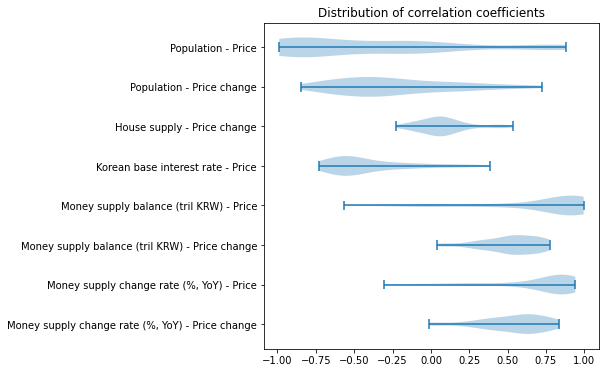

In [17]:
# Distribution of correlation coefficients

column_order = [0,6,7,3,4,10,5,11]
column_order.reverse()

pos   = list(range(len(column_order)))
label = [df_corr_dist.columns[i] for i in column_order]
data  = [df_corr_dist[df_corr_dist.columns[i]].values for i in column_order]

fig, ax = plt.subplots(figsize=(6, 6))
plt.violinplot(data, pos, vert=False)
ax.set_yticks(pos)
ax.set_yticklabels(label)
plt.title('Distribution of correlation coefficients')
# plt.show() hides unnecessary text output
plt.show()

### - Among the correlations above, the first two which take population as x-variable have too broad a band. Population alone doesn't seem to have enough influence on price.
### - Most of the 'House supply - Price change' correlation coefficients are too close to 0

## ∴ Therefore, for further analysis and presentation with Power BI, I am going to use only 1) base interest rate, 2) money supply balance and 3) money supply change rate as x-variables.

## ∴ Also, I am not going to use price change rate but only going to use price as y-variable because:
- When I got the Month over Month change rate of two of the aforementioned x-variables, Korean base interest rate and money supply balance, to pair and analyze with Month over Month price change rate, the p-values were too high (see codes below)
- Likewise, I converted current price change rate data from Month over Month based to Year over Year based in order to synchronize with one of the x-variables above, money supply change rate (Month over Month based), the p-values were too high (see codes below)

In [18]:
# get Price change YoY

df_price_yoy = df_price.pct_change(12)*100
df_price_yoy = df_price_yoy.replace(np.nan, 0)
df_price_yoy.iloc[12: df_price_yoy.shape[0]]

region           Total                                                  Seoul  \
size (sq m)      135<x 102<x<=135  85<x<=102   60<x<=85      x<=60      135<x   
2017.01       4.274846   3.789109   5.231211   4.684872   6.025240   5.869123   
2017.02       4.281145   3.882355   5.300384   4.657818   6.014244   5.820697   
2017.03       4.421026   3.989536   5.401855   4.739430   5.975208   5.961609   
2017.04       4.492857   4.087831   5.380714   4.753922   5.952907   6.170065   
2017.05       4.793573   4.315495   5.602437   4.846312   5.887324   6.640002   
...                ...        ...        ...        ...        ...        ...   
2021.11      22.414274  25.670856  36.221101  31.312957  25.977137  20.723766   
2021.12      21.372080  23.964850  35.011445  30.673114  23.811773  21.121749   
2022.01      19.648631  22.417778  34.805349  30.116265  21.897056  20.718345   
2022.02      18.178960  20.499049  34.602727  29.078958  19.252277  20.696162   
2022.03      17.478337  19.093268  34.250156  27.912810  16.677332  20.760432   

region                                                   ... Gyeongsangbuk-do  \
size (sq m) 102<x<=135  85<x<=102   60<x<=85      x<=60  ...            135<x   
2017.01       6.004160  11.123392   8.709064  11.299803  ...        -0.034222   
2017.02       6.079834  11.245177   8.733304  11.447689  ...        -0.155831   
2017.03       6.230237  11.340206   8.891253  11.337825  ...         0.395076   
2017.04       6.418068  11.227313   8.908289  11.158922  ...         0.401229   
2017.05       6.817546  11.802412   9.222849  11.072721  ...         0.401229   
...                ...        ...        ...        ...  ...              ...   
2021.11      19.843455  31.478722  25.989572  20.386219  ...        15.697468   
2021.12      18.879120  31.957896  26.124049  18.690206  ...        10.811773   
2022.01      17.730327  31.555611  25.843716  17.063535  ...         7.699450   
2022.02      16.316073  31.129095  25.256908  14.975385  ...         6.041479   
2022.03      15.264151  30.892730  24.755634  13.000974  ...         5.671546   

region                                                  Gyeongsangnam-do  \
size (sq m) 102<x<=135  85<x<=102   60<x<=85      x<=60            135<x   
2017.01      -2.707869  -2.197227  -4.930343  -5.152344        -0.554900   
2017.02      -2.543935  -2.120769  -4.737271  -5.027874        -0.879556   
2017.03      -2.086201  -1.941902  -4.943329  -5.076785        -0.953441   
2017.04      -1.919997  -2.205193  -4.823839  -4.793720        -1.230988   
2017.05      -1.944247  -2.192426  -4.701828  -4.797789        -1.266227   
...                ...        ...        ...        ...              ...   
2021.11      21.533522  18.548408  29.096997  19.550990         9.928153   
2021.12      17.105034  15.661294  29.822061  17.562747         9.460950   
2022.01      16.348155  15.756053  31.099965  16.545731         9.187422   
2022.02      16.123907  15.578673  32.581909  15.995176        10.037468   
2022.03      15.598720  15.890527  33.280883  15.086776        10.688399   

region                                                   
size (sq m) 102<x<=135  85<x<=102   60<x<=85      x<=60  
2017.01       1.587143  -0.145258  -0.070900  -0.405132  
2017.02       1.086843  -0.295900  -0.305269  -0.793533  
2017.03       0.900431   0.090609  -0.561780  -0.891906  
2017.04       0.760490  -0.049480  -0.640192  -1.128992  
2017.05       0.451652   0.511127  -0.927796  -1.297464  
...                ...        ...        ...        ...  
2021.11      21.712343  48.053601  25.910701  20.735954  
2021.12      21.774939  49.325640  25.820250  16.775745  
2022.01      22.689419  50.511497  26.487979  14.988325  
2022.02      24.757915  56.374814  27.785247  13.923358  
2022.03      25.687570  58.239994  28.598326  13.449814  

[63 rows x 85 columns]

In [19]:
# show which regions and sizes have a p-value of higher than 0.05 between money supply balance (YoY) and price change rate (YoY)

p_money_price_yoy = pd.DataFrame()

array_region = []
array_size = []
p_values = []
exact_p = []

for region in regions_reordered:
    for size in sizes_reordered:

        array_region.append(region)
        array_size.append(size)

        p_x = df_money_change_rate.iloc[12:74][region].values
        p_y = df_price_yoy.iloc[12: df_price_yoy.shape[0]-1][region][size].values

        p = ttest_ind(p_x, p_y).pvalue
        exact_p.append(p)

        if p < 0.05:
            p_values.append('O')
        else:
            p_values.append('X')

arrays = [array_region, array_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

p_money_price_yoy_sub = pd.DataFrame(index=index)
p_money_price_yoy_sub['P lower than 0.05?'] = p_values
p_money_price_yoy_sub['Money supply change rate (%, YoY)'] = exact_p
p_money_price_yoy = pd.concat([p_money_price_yoy, p_money_price_yoy_sub], axis=1)


'''
print("when price change rate is the y-variable - 'X' means p-value is higher than 0.05 and statistically not significant")
p_price_mom[(p_price_mom['Population']=='X') | (p_price_mom['House supply']=='X') | (p_price_mom['Unsold houses']=='X') | \
            (p_price_mom['Korean base interest rate']=='X') | \
            (p_price_mom['Money supply balance (tril KRW)']=='X') | (p_price_mom['Money supply change rate (%, YoY)']=='X')]
'''

p_money_price_yoy[p_money_price_yoy['P lower than 0.05?'] == 'X']

P lower than 0.05?  \
Total             85<x<=102                   X   
                  60<x<=85                    X   
Busan             102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Daegu             102<x<=135                  X   
Incheon           135<x                       X   
                  102<x<=135                  X   
                  60<x<=85                    X   
                  x<=60                       X   
Gwangju           102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Daejeon           x<=60                       X   
Ulsan             135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
Gangwon           85<x<=102                   X   
Chungcheongbuk-do 135<x                       X   
Chungcheongnam-do 85<x<=102                   X   
Jeollanam-do      135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   

                              Money supply change rate (%, YoY)  
Total             85<x<=102                            0.202120  
                  60<x<=85                             0.114552  
Busan             102<x<=135                           0.107403  
                  85<x<=102                            0.685745  
                  60<x<=85                             0.462697  
                  x<=60                                0.199768  
Daegu             102<x<=135                           0.773905  
Incheon           135<x                                0.275922  
                  102<x<=135                           0.067488  
                  60<x<=85                             0.469736  
                  x<=60                                0.999859  
Gwangju           102<x<=135                           0.347936  
                  85<x<=102                            0.050821  
                  60<x<=85                             0.316897  
Daejeon           x<=60                                0.407784  
Ulsan             135<x                                0.905596  
                  102<x<=135                           0.274967  
                  85<x<=102                            0.388372  
Gangwon           85<x<=102                            0.193211  
Chungcheongbuk-do 135<x                                0.149097  
Chungcheongnam-do 85<x<=102                            0.502780  
Jeollanam-do      135<x                                0.464936  
                  102<x<=135                           0.849351  
                  85<x<=102                            0.660510

In [20]:
# Interactive graph for 'money balance change rate (YoY) - price change (YoY)' relationship

regions_reordered = ['Total', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', \
                   'Daejeon', 'Ulsan', 'Sejong', 'Gyeonggi', 'Gangwon', \
                   'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', \
                   'Gyeongsangbuk-do', 'Gyeongsangnam-do']
sizes_reordered = ['135<x', '102<x<=135', '85<x<=102', '60<x<=85', 'x<=60']


# dropboxes for choosing x and y variables

widget_var_x2 = widgets.Dropdown(\
                    options = [('Money supply change rate (%, YoY)', 0) ],\
                    description = 'x variable')
widget_var_y2 = widgets.Dropdown(options = [('Price change (YoY, %)', 0)], \
                      description = 'y variable')

# dropboxes for filtering by region and size

widget_region = widgets.Dropdown(options = regions_reordered, description = 'region')
widget_size = widgets.Dropdown(options = sizes_reordered, description = 'sq m')

# interactive dropboxes, correlation coefficient and line graph 

@widgets.interact(variable_x2 = widget_var_x2, variable_y2 = widget_var_y2, region = widget_region, size = widget_size)
def update(variable_x2, variable_y2, region, size):
    
    # for money supply variables, there are data for only up to Feb 2022, in contrast to the rest that have data up to Mar 2022
    # therefore, range of other data should be also curtailed to Feb 2022 to have the same number of data for each variable.
        
    df_variable_x2 = df_money_change_rate.iloc[12:74]
    df_variable_y2 = df_price_yoy.iloc[12: df_price_yoy.shape[0]-1]

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(df_variable_y2.index, df_variable_x2[region], 'g-')
    ax2.plot(df_variable_y2.index, df_variable_y2[region][size], 'b-')
    ax1.set_xticks(df_variable_y2.index[len(df_variable_x2.index)%6-1::3])
    ax1.set_xticklabels(df_variable_y2.index[len(df_variable_x2.index)%6-1::3], rotation=90)

    ax1.set_ylabel(widget_var_x2.options[variable_x2][0], color='g') 
    ax2.set_ylabel(widget_var_y2.options[variable_y2][0], color='b')
    plt.axhline(y=0.0, color='r', linestyle='-')

    plt.title(widget_var_x2.options[variable_x2][0] + ' and ' + widget_var_y2.options[variable_y2][0])
    
    p_value = ttest_ind(df_variable_x2[region].values, df_variable_y2[region][size].values).pvalue

    print('Correlation coefficient between {} and {}: '.format(widget_var_x2.options[variable_x2][0], widget_var_y2.options[variable_y2][0]))
    print(np.corrcoef(x=df_variable_x2[region], y=df_variable_y2[region][size])[0][1])
    print('\nP-value (should be less than 0.05 to be statistically significant): %.6f' %p_value)

interactive(children=(Dropdown(description='x variable', options=(('Money supply change rate (%, YoY)', 0),), …

In [21]:
# show which regions and sizes have a p-value of higher than 0.05 between money supply balance (YoY) and price change rate (MoM)

p_money_price = pd.DataFrame()

array_region = []
array_size = []
p_values = []
exact_p = []

for region in regions_reordered:
    for size in sizes_reordered:

        array_region.append(region)
        array_size.append(size)

        p_x = df_money_change_rate.iloc[:74][region].values
        p_y = df_price_mom.iloc[:74][region][size].values

        p = ttest_ind(p_x, p_y).pvalue
        exact_p.append(p)

        if p < 0.05:
            p_values.append('O')
        else:
            p_values.append('X')

arrays = [array_region, array_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

p_money_price_sub = pd.DataFrame(index=index)
p_money_price_sub['P lower than 0.05?'] = p_values
p_money_price_sub['Money supply change (YoY) - Price change (MoM)'] = exact_p
p_money_price = pd.concat([p_money_price, p_money_price_sub], axis=1)


'''
print("when price change rate is the y-variable - 'X' means p-value is higher than 0.05 and statistically not significant")
p_price_mom[(p_price_mom['Population']=='X') | (p_price_mom['House supply']=='X') | (p_price_mom['Unsold houses']=='X') | \
            (p_price_mom['Korean base interest rate']=='X') | \
            (p_price_mom['Money supply balance (tril KRW)']=='X') | (p_price_mom['Money supply change rate (%, YoY)']=='X')]
'''

p_money_price[p_money_price['P lower than 0.05?'] == 'X']

,,P lower than 0.05?,Money supply change (YoY) - Price change (MoM)


In [22]:
# Korean base interest rate - Month over Month change rate

df_int_rate_mom = df_int_rate.pct_change()*100
df_int_rate_mom = df_int_rate_mom.replace(np.nan, 0)
df_int_rate_mom

month,Total,Ulsan,Seoul,Gyeongsangbuk-do,Gangwon,Chungcheongbuk-do,Jeollabuk-do,Daegu,Daejeon,Gyeongsangnam-do,Gyeonggi,Incheon,Gwangju,Jeollanam-do,Busan,Sejong,Chungcheongnam-do
2016.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.11,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333
2021.12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022.01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
2022.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
# show which regions and sizes have a p-value of higher than 0.05 between base interest rate and price change rate

p_int_price_mom = pd.DataFrame()

array_region = []
array_size = []
p_values = []
exact_p = []

for region in regions_reordered:
    for size in sizes_reordered:

        array_region.append(region)
        array_size.append(size)

        p_x = df_int_rate_mom.iloc[:74][region].values
        p_y = df_price_mom.iloc[:74][region][size].values

        p = ttest_ind(p_x, p_y).pvalue
        exact_p.append(p)

        if p < 0.05:
            p_values.append('O')
        else:
            p_values.append('X')

arrays = [array_region, array_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

p_int_price_mom_sub = pd.DataFrame(index=index)
p_int_price_mom_sub['P lower than 0.05?'] = p_values
p_int_price_mom_sub['Base interest change rate (%, MoM)'] = exact_p
p_int_price_mom = pd.concat([p_int_price_mom, p_int_price_mom_sub], axis=1)


'''
print("when price change rate is the y-variable - 'X' means p-value is higher than 0.05 and statistically not significant")
p_price_mom[(p_price_mom['Population']=='X') | (p_price_mom['House supply']=='X') | (p_price_mom['Unsold houses']=='X') | \
            (p_price_mom['Korean base interest rate']=='X') | \
            (p_price_mom['Money supply balance (tril KRW)']=='X') | (p_price_mom['Money supply change rate (%, YoY)']=='X')]
'''

p_int_price_mom[p_int_price_mom['P lower than 0.05?'] == 'X']

P lower than 0.05?  \
Total            135<x                       X   
                 102<x<=135                  X   
                 85<x<=102                   X   
                 60<x<=85                    X   
                 x<=60                       X   
...                                        ...   
Gyeongsangnam-do 135<x                       X   
                 102<x<=135                  X   
                 85<x<=102                   X   
                 60<x<=85                    X   
                 x<=60                       X   

                             Base interest change rate (%, MoM)  
Total            135<x                                 0.705498  
                 102<x<=135                            0.654829  
                 85<x<=102                             0.655161  
                 60<x<=85                              0.676536  
                 x<=60                                 0.679911  
...                                                         ...  
Gyeongsangnam-do 135<x                                 0.847979  
                 102<x<=135                            0.995420  
                 85<x<=102                             0.939024  
                 60<x<=85                              0.949890  
                 x<=60                                 0.847685  

[85 rows x 2 columns]

In [24]:
# Money supply - Month over Month change rate

df_money_balance_mom = df_money_balance.pct_change()*100
df_money_balance_mom = df_money_balance_mom.replace(np.nan, 0)
df_money_balance_mom

,Total,Ulsan,Seoul,Gyeongsangbuk-do,Gangwon,Chungcheongbuk-do,Jeollabuk-do,Daegu,Daejeon,Gyeongsangnam-do,Gyeonggi,Incheon,Gwangju,Jeollanam-do,Busan,Sejong,Chungcheongnam-do
2016.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016.02,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867,1.056867
2016.03,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573,0.402573
2016.04,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479,0.200479
2016.05,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885,0.595885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021.10,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263,0.845263
2021.11,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762,1.447762
2021.12,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596,0.706596
2022.01,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254,0.392254


In [25]:
# show which regions and sizes have a p-value of higher than 0.05 between money supply balance and price change rate

p_money_price_mom = pd.DataFrame()

array_region = []
array_size = []
p_values = []
exact_p = []

for region in regions_reordered:
    for size in sizes_reordered:

        array_region.append(region)
        array_size.append(size)

        p_x = df_money_balance_mom.iloc[:74][region].values
        p_y = df_price_mom.iloc[:74][region][size].values

        p = ttest_ind(p_x, p_y).pvalue
        exact_p.append(p)

        if p < 0.05:
            p_values.append('O')
        else:
            p_values.append('X')

arrays = [array_region, array_size]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples)

p_money_price_mom_sub = pd.DataFrame(index=index)
p_money_price_mom_sub['P lower than 0.05?'] = p_values
p_money_price_mom_sub['Money supply change rate (%, MoM)'] = exact_p
p_money_price_mom = pd.concat([p_money_price_mom, p_money_price_mom_sub], axis=1)


'''
print("when price change rate is the y-variable - 'X' means p-value is higher than 0.05 and statistically not significant")
p_price_mom[(p_price_mom['Population']=='X') | (p_price_mom['House supply']=='X') | (p_price_mom['Unsold houses']=='X') | \
            (p_price_mom['Korean base interest rate']=='X') | \
            (p_price_mom['Money supply balance (tril KRW)']=='X') | (p_price_mom['Money supply change rate (%, YoY)']=='X')]
'''

p_money_price_mom[p_money_price_mom['P lower than 0.05?'] == 'X']

P lower than 0.05?  \
Total             135<x                       X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Seoul             85<x<=102                   X   
Busan             102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Daegu             135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Incheon           135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Gwangju           135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Daejeon           x<=60                       X   
Ulsan             135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Sejong            135<x                       X   
Gyeonggi          135<x                       X   
                  85<x<=102                   X   
Gangwon           135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Chungcheongbuk-do 135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Chungcheongnam-do 135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Jeollabuk-do      102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
Jeollanam-do      135<x                       X   
                  102<x<=135                  X   
                  85<x<=102                   X   
                  60<x<=85                    X   
                  x<=60                       X   
Gyeongsangnam-do  85<x<=102                   X   

                              Money supply change rate (%, MoM)  
Total             135<x                                0.145538  
                  85<x<=102                            0.333271  
                  60<x<=85                             0.200215  
                  x<=60                                0.064801  
Seoul             85<x<=102                            0.097832  
Busan             102<x<=135                           0.133832  
                  85<x<=102                            0.345941  
                  60<x<=85                             0.290497  
                  x<=60                                0.695356  
Daegu             135<x                                0.724516  
                  102<x<=135                           0.387484  
                  85<x<=102                            0.234108  
                  60<x<=85                             0.174819  
Incheon           135<x                                0.428700  
                  102<x<=135                           0.088312  
                  85<x<=102                            0.115360  
                  60<x<=85                             0.168688  
                  x<=60                                0.466554  
Gwangju           135<x                                0.405622  
     